In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split



c:\users\evergreen\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
stocks = pd.read_csv(os.path.join('data2','sp500_closes-12.10.2017.csv'),index_col=0)
stock_list = stocks.columns.tolist()
print("^GSPC and stocks:\n",stock_list)
#print(stocks.head())
print("Stocks shape:",stocks.shape)
#print(stocks.describe())
num_stocks = len(stock_list)

^GSPC and stocks:
 ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BCR', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CS

In [3]:
data = pd.DataFrame()
#drop those stocks with empty row/rows
data = stocks.copy()
data = data.dropna(axis=1,how='any')
data_list = data.columns.tolist()
num_data = len(data_list)

gspc = pd.DataFrame(data.pop('^GSPC'))
print("Data before normalization shape: ", data.shape)
#print("Data describe():\n", data.describe())

Data before normalization shape:  (2519, 455)


In [4]:
#PCA analysis. Normalize the data using lambda function
scale_function = lambda x: (x - x.mean()) / x.std()
X=data.apply(scale_function)
print ("data after normalization shape: ",data.shape)
print ("X after normalization describe\n", X.shape)
pca = KernelPCA().fit(X)
print ("Number of Eigenvalue(components) from the model: ",len(pca.lambdas_))

data after normalization shape:  (2519, 455)
X after normalization describe
 (2519, 455)
Number of Eigenvalue(components) from the model:  1510


In [5]:
#first 10 eigenvalue
print("First 10 eigenvalue: ",(pca.lambdas_)[:10].round())

First 10 eigenvalue:  [ 878664.   89480.   65541.   28909.   16238.   15765.    7859.    5504.
    3908.    3624.]


In [6]:
#normaize to percentage
get_weight = lambda x: x / x.sum()
print("First 10 components wieght: ",get_weight(pca.lambdas_)[:10])
print("First 10 components total wieght: ",get_weight(pca.lambdas_)[:10].sum())
print("First 5 components total wieght: ",get_weight(pca.lambdas_)[:5].sum())
print("First 2 components total wieght: ",get_weight(pca.lambdas_)[:2].sum())
print("First 1 components total wieght: ",get_weight(pca.lambdas_)[:1].sum())

First 10 components wieght:  [ 0.76692977  0.07810154  0.05720646  0.02523278  0.01417305  0.01376066
  0.00685919  0.00480439  0.00341111  0.00316291]
First 10 components total wieght:  0.973641844374
First 5 components total wieght:  0.941643596262
First 2 components total wieght:  0.845031312748
First 1 components total wieght:  0.766929772386


5 individual component shape: (2519, 5)
[[-10.68842318  -8.47499489 -18.16637745  -3.4211028   -1.5434698 ]
 [-11.65915328  -8.31332397 -16.86185024  -3.41287082  -1.34524739]
 [-11.71488674  -8.13917955 -16.87607003  -3.19147531  -1.50045292]
 ..., 
 [ 39.08925931 -12.9604636   -2.07669209   9.03121548   5.76995336]
 [ 38.60803039 -12.8088424   -1.97677622   9.03843188   5.77508602]
 [ 38.76044196 -12.90159389  -1.95497484   9.20291213   5.72661615]]
                ^GSPC       PCA1      PCA2
Date                                      
10/31/07  1549.380005 -10.688423 -8.474995
11/1/07   1508.439941 -11.659153 -8.313324
11/2/07   1509.650024 -11.714887 -8.139180
11/5/07   1502.170044 -11.923770 -8.195689
11/6/07   1520.270020 -11.522640 -8.097800
5 individual component with ^GSPC shape: (2519, 3)


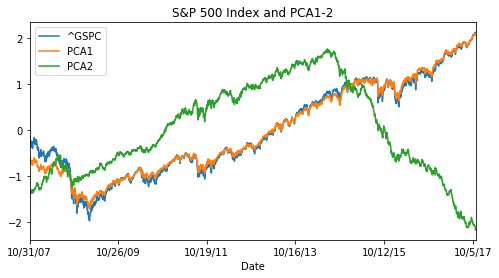

In [7]:
#Construct PCA index
%matplotlib inline

pca_comps=KernelPCA(n_components=5).fit_transform(X)

gspc['PCA1'] = pca_comps[:,0]
gspc['PCA2'] = pca_comps[:,1]
#gspc['PCA3'] = pca_comps[:,2]
#gspc['PCA4'] = pca_comps[:,3]
#gspc['PCA5'] = pca_comps[:,4]
print("5 individual component shape:",pca_comps.shape)
print(pca_comps)
print(gspc.head())
print("5 individual component with ^GSPC shape:",gspc.shape)
gspc.apply(scale_function).plot(title="S&P 500 Index and PCA1-2",figsize=(8, 4))
plt.show()

In [8]:
data['PCA1'] = pca_comps[:,0]
data['PCA2'] = pca_comps[:,1]
data['PCA3'] = pca_comps[:,2]
data['PCA4'] = pca_comps[:,3]
data['PCA5'] = pca_comps[:,4]

print ("data and PCA:", data.head())

data and PCA:                 MMM        ABT        ACN       ATVI        AYI       ADBE  \
Date                                                                         
10/31/07  66.495193  20.041937  31.417177  10.807923  36.697865  47.900002   
11/1/07   64.601082  19.858467  30.958595  10.515447  35.508411  46.919998   
11/2/07   65.363365  19.832788  30.894228  10.533727  37.149689  47.880001   
11/5/07   65.486534  19.821775  30.210373  10.465178  36.052422  47.700001   
11/6/07   65.794510  19.939198  29.180569  10.296091  36.946823  47.630001   

            AMD        AAP        AES        AET    ...          XLNX  \
Date                                                ...                 
10/31/07  13.08  32.951408  18.492378  51.325520    ...     18.963839   
11/1/07   12.80  33.859238  18.276449  50.274712    ...     18.831707   
11/2/07   13.17  33.588818  18.716951  49.689903    ...     18.746214   
11/5/07   13.42  33.946148  18.932886  49.753880    ...     18.590780   
1

In [9]:
#split data
pca_comp2=KernelPCA(n_components=2).fit_transform(X)
print ("X: ",pca_comp2.shape)
#define y
y = gspc['^GSPC']
print ("y: ",y.head())
#split data

splits = train_test_split(pca_comp2, y, test_size=0.083)
X_train, X_test, y_train, y_test = splits
print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print ("X_test: ", X_test.shape)
print ("y_test: ", y_test.shape)

X:  (2519, 2)
y:  Date
10/31/07    1549.380005
11/1/07     1508.439941
11/2/07     1509.650024
11/5/07     1502.170044
11/6/07     1520.270020
Name: ^GSPC, dtype: float64
X_train:  (2309, 2)
y_train:  (2309,)
X_test:  (210, 2)
y_test:  (210,)


In [10]:
# Import the estimator
from sklearn.linear_model import Lasso
# Instantiate the estimator
model = Lasso()
# Instantiate the estimator
#model = KernelPCA(n_components=5)
# Fit the data to the estimator
model.fit(X_train, y_train)
# Generate a prediction
model.predict(X_test)

array([ 1947.79187154,  1849.56219504,  1414.41823408,  2370.2545017 ,
        1454.6821849 ,  1894.67656523,  1097.7141621 ,  2144.45304602,
        1701.35715434,  1185.73333359,  1397.93794467,  1313.36775573,
        1347.61767233,  1226.2842272 ,  2123.94389898,  1329.12663037,
         980.32227958,  1225.36857552,   966.22384523,  1288.64535168,
        1683.01650894,  1183.04787884,  1214.48240541,  1193.60114915,
        1231.16130444,  1562.81797721,  1595.80908975,  1094.33893012,
        1541.06603433,  2171.41356357,  1442.46778694,  2035.51003412,
        1172.04973422,  1331.64799198,  1407.86957857,   967.45138136,
        1429.01184846,  2405.30248737,  1957.98267196,  1390.63227996,
        2286.61730121,  2360.05121925,  1608.37561382,  1159.49281207,
         981.89245258,  1979.21649777,  1357.6698346 ,  2394.96170881,
        1929.5446859 ,  1919.34719734,   929.27292427,  1255.68368837,
        1986.08045233,  1115.79624492,  2198.27550501,  1325.30937194,
      

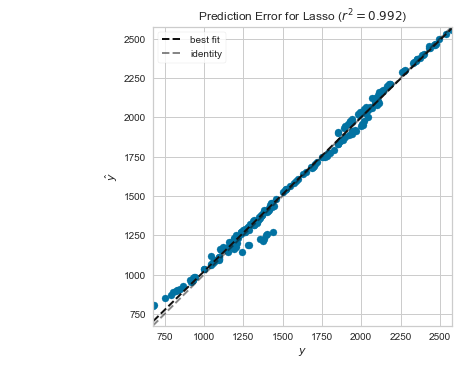

In [11]:
# Import the model and visualizer
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError
# Instantiate the visualizer
visualizer = PredictionError(Lasso())
# Fit
visualizer.fit(X_train, y_train)
# Score and visualize
visualizer.score(X_test, y_test)
visualizer.poof()



In [12]:
# LinearRegression
from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions

array([ 1947.57491855,  1849.33436342,  1414.24760589,  2370.56557995,
        1454.50751477,  1894.43484759,  1097.73849725,  2144.62789798,
        1701.14907115,  1185.81441527,  1397.77751491,  1313.2944989 ,
        1347.52228406,  1226.35220011,  2124.12398461,  1329.04295299,
         980.3881004 ,  1225.46768089,   966.33045745,  1288.50020659,
        1682.80026354,  1183.06766011,  1214.45438184,  1193.62005316,
        1231.12420575,  1562.62535158,  1595.61644768,  1094.36468441,
        1540.8702157 ,  2171.62768258,  1442.29755463,  2035.64561847,
        1172.07460465,  1331.56414632,  1407.7059255 ,   967.544766  ,
        1428.83824801,  2405.67150614,  1957.74622503,  1390.47577803,
        2286.84797284,  2360.36481945,  1608.17645801,  1159.49006128,
         981.94471916,  1979.04412411,  1357.57360897,  2395.33926004,
        1929.67987744,  1919.09936372,   929.3764833 ,  1255.77178647,
        1986.13330659,  1115.80158483,  2198.47641092,  1325.17707709,
      

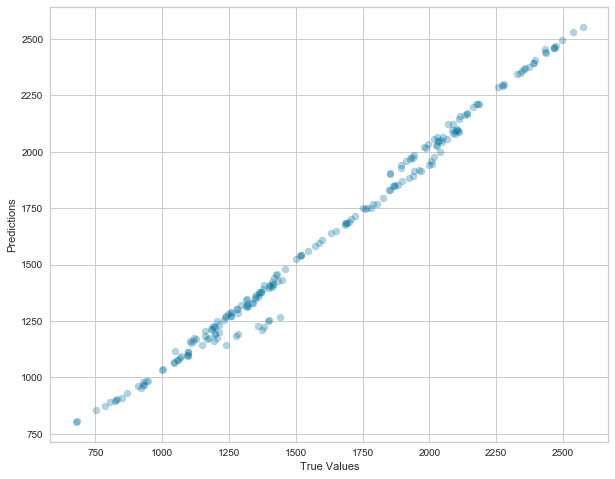

In [13]:
# The line / model
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [14]:
print ("Score:", model.score(X_test, y_test))

Score: 0.991789777502


In [15]:

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

c:\users\evergreen\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
# Perform 12-fold cross validation
scores = cross_val_score(model, pca_comp2, y, cv=12)
print ("Cross-validated scores:", scores)

Cross-validated scores: [-5.52200833  0.56144744  0.90168031  0.7464165   0.78488338  0.86160422
  0.96230188  0.83608914  0.5037111   0.87402932  0.47127847  0.95396701]


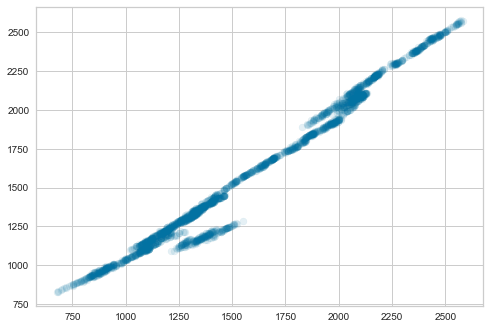

In [17]:
# Make cross validated predictions
predictions = cross_val_predict(model, pca_comp2, y, cv=12)
plt.scatter(y, predictions,alpha=0.1)

In [18]:
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.980003626965
